In [1]:
import os
import sys
import dateutil.parser
import dateutil.relativedelta as dateutil_rd

spark_path = "C:/opt/spark"

os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path

sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.9-src.zip")

from pyspark import SparkContext
from pyspark import SparkConf
from pyspark import SQLContext

sc = SparkContext("local", "test")
sqlContext = SQLContext(sc)

In [2]:
print(sc)
print(sqlContext)

In [3]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [4]:
%reload_ext autoreload
%autoreload 2
%pdb

Automatic pdb calling has been turned ON


# DAMLAS - Machine Learning At Scale
## Assignment - HW4
Data Analytics and Machine Learning at Scale
Target, Minneapolis

---
__Name:__  Vicki J Seely   
__Class:__ DAMLAS (Summer 2016)     
__Email:__  vicki.seely@target.com     
__Week:__   04

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW 4 Problems](#3)   
    4.0.  [Final Project description](#4.0)   
    4.1.  [Build a decision to predict whether you can play tennis or no](#4.1)   
    4.2.  [Regression Tree (OPTIONAL Homework)](#4.2)    
    4.3.  [Predict survival on the Titanic](#4.3)    
    4.4.  [Heritage Healthcare Prize (Predict # Days in Hospital next year)](#4.4)  


<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Thursday, 08/18/2016 at 11AM (CT).


* Prepare a single Jupyter notebook (not a requirment), please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](http://goo.gl/forms/er3OFr5eCMWDngB72)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.

<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* [Lecture Slides on Decision Trees and Ensembles](https://www.dropbox.com/s/lm4vuocqoq6mq7k/Lecture-13-Decision-Trees-PLanet.pdf?dl=0)
* [Notebook on learning classification decision trees](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/p99ro9v9z81wtwh/Decision_Trees.ipynb)

* Chapter 17 on decision Trees,   https://www.dropbox.com/s/5ca98ah5chqlcmn/Data_Science_from_Scratch%20%281%29.pdf?dl=0   [Please do not share this PDF]
* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. __(Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))__
* Ryza, Sandy, Laserson, Uri, Owen, Sean, & Wills, Josh. (2015). Advanced analytics with Spark: Patterns for learning from data at scale. Sebastopol, CA: O’Reilly Publishers.
---

---

## 3.  HW4  <a name="4"></a>
[Back to Table of Contents](#TOC)

 <a name="4.0"></a>
## HW4.0 Final Project description

Please prepare your project description using the following format
* 200 words abstract
* data source and description
* pipeline of steps (in a block diagram)
* Metrics for success

PLEASE NOTE: We will probably have project team sizes of 3 people plus/minus 1

 <a name="4.1"></a>
## HW4.1 Build a decision to predict whether you can play tennis or not

[Back to Table of Contents](#TOC)

Decision Trees

Write a program in Python (or in Spark; the Spark part is optional) to implement the ID3 decision tree algorithm. Have a look at this [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/p99ro9v9z81wtwh/Decision_Trees.ipynb)  for ideas. You should build a tree to predict PlayTennis, based on the other attributes (but, do not use the Day attribute in your tree.). You should read in a space delimited dataset in a file called dataset.txt and output to the screen your decision tree and the training set accuracy in some readable format. For example, here is the tennis dataset. The first line will contain the names of the fields:

<PRE>
Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no
</PRE>

The last column is the classification attribute, and will always contain contain the values yes or no.

For output, you can choose how to draw the tree so long as it is clear what the tree is. You might find it easier if you turn the decision tree on its side, and use indentation to show levels of the tree as it grows from the left. For example:

<PRE>
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes

</PRE>

You don't need to make your tree output look exactly like above: feel free to print out something similarly readable if you think it is easier to code.

You may find Python dictionaries especially useful here, as they will give you a quick an easy way to help manage counting the number of times you see a particular attribute.

Here are some FAQs that I've gotten in the past regarding this assignment, and some I might get if I don't answer them now.

__Should my code work for other datasets besides the tennis dataset?__ 
Yes. We will give your program a different dataset to try it out with. You may assume that our dataset is correct and well-formatted, but you should not make assumptions regrading number of rows, number of columns, or values that will appear within. The last column will also be the classification, and will always contain yes or no values.

__Is it possible that some value, like "normal," could appear in more than one column?__
Yes. In addition to the column "humidity", we might have had another column called "skycolor" which could have values "normal," "weird," and "bizarre."

__Could "yes" and "no" appear as possible values in columns other than the classification column?__
Yes. In addition to the classification column "playtennis," we might have had another column called "seasonalweather" which would contain "yes" and "no."

In [5]:
inputs = [
({'day':1, 'outlook':'sunny','temperature':'hot','humidity':'high', 'wind':'FALSE'}, False),
({'day':2, 'outlook':'sunny', 'temperature':'hot', 'humidity':'high', 'wind':'TRUE'}, False),
({'day':3, 'outlook':'overcast', 'temperature':'hot','humidity':'high','wind':'FALSE'}, True),
({'day':4, 'outlook':'rainy', 'temperature':'mild', 'humidity':'high', 'wind':'FALSE'}, True),
({'day':5, 'outlook':'rainy', 'temperature':'cool', 'humidity':'normal', 'wind':'FALSE'}, True),
({'day':6, 'outlook':'rainy', 'temperature':'cool', 'humidity':'normal', 'wind':'TRUE'}, False),
({'day':7, 'outlook':'overcast', 'temperature':'cool', 'humidity':'normal', 'wind':'TRUE'}, True),
({'day':8, 'outlook':'sunny', 'temperature':'mild', 'humidity':'high', 'wind':'FALSE'}, False),
({'day':9, 'outlook':'sunny', 'temperature':'cool', 'humidity':'normal', 'wind':'FALSE'}, True),
({'day':10, 'outlook':'rainy', 'temperature':'mild', 'humidity':'normal', 'wind':'FALSE'}, True),
({'day':11, 'outlook':'sunny', 'temperature':'mild', 'humidity':'normal', 'wind':'TRUE'}, True),
({'day':12, 'outlook':'overcast', 'temperature':'mild', 'humidity':'high', 'wind':'TRUE'}, True),
({'day':13, 'outlook':'overcast', 'temperature':'hot', 'humidity':'normal', 'wind':'FALSE'}, True),
({'day':14, 'outlook':'rainy', 'temperature':'mild', 'humidity':'high', 'wind':'TRUE'}, False)
]

In [6]:
for input in inputs:
    del input[0]['day']
print inputs

[({'outlook': 'sunny', 'humidity': 'high', 'wind': 'FALSE', 'temperature': 'hot'}, False), ({'outlook': 'sunny', 'humidity': 'high', 'wind': 'TRUE', 'temperature': 'hot'}, False), ({'outlook': 'overcast', 'humidity': 'high', 'wind': 'FALSE', 'temperature': 'hot'}, True), ({'outlook': 'rainy', 'humidity': 'high', 'wind': 'FALSE', 'temperature': 'mild'}, True), ({'outlook': 'rainy', 'humidity': 'normal', 'wind': 'FALSE', 'temperature': 'cool'}, True), ({'outlook': 'rainy', 'humidity': 'normal', 'wind': 'TRUE', 'temperature': 'cool'}, False), ({'outlook': 'overcast', 'humidity': 'normal', 'wind': 'TRUE', 'temperature': 'cool'}, True), ({'outlook': 'sunny', 'humidity': 'high', 'wind': 'FALSE', 'temperature': 'mild'}, False), ({'outlook': 'sunny', 'humidity': 'normal', 'wind': 'FALSE', 'temperature': 'cool'}, True), ({'outlook': 'rainy', 'humidity': 'normal', 'wind': 'FALSE', 'temperature': 'mild'}, True), ({'outlook': 'sunny', 'humidity': 'normal', 'wind': 'TRUE', 'temperature': 'mild'}, T

In [7]:
from __future__ import division
from collections import Counter, defaultdict
from functools import partial
import math, random

def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)
#    return max(1.0,sum(-p * math.log(p, 2) for p in class_probabilities if p))

def class_probabilities(labels):
    total_count = len(labels)
    return [count/total_count for count in Counter(labels).values()]

def data_entropy(labeled_data):        
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)    
    return sum(data_entropy(subset)*len(subset)/total_count for subset in subsets )

def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item 
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups
    
def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
    return group_by(inputs, lambda x: x[0][attribute]) 

def partition_entropy_by(inputs, attribute):
    """computes the entropy corresponding to the given partition"""        
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

In [8]:
for key in['outlook','temperature','humidity','wind']:
    print key, partition_entropy_by(inputs, key)

outlook 0.693536138896
temperature 0.911063393012
humidity 0.788450457308
wind 0.892158928262


In [9]:
senior_inputs = [(input, label) for input, label in inputs if input["outlook"] == "sunny"]
for key in ['temperature','humidity','wind']:
    print 'Sunny:', key, partition_entropy_by(senior_inputs, key)
    
senior_inputs = [(input, label) for input, label in inputs if input["outlook"] == "overcast"]
for key in ['temperature','humidity','wind']:
    print 'Overcast:', key, partition_entropy_by(senior_inputs, key)
    
senior_inputs = [(input, label) for input, label in inputs if input["outlook"] == "rainy"]
for key in ['temperature','humidity','wind']:
    print 'Rainy:', key, partition_entropy_by(senior_inputs, key)

Sunny: temperature 0.4
Sunny: humidity 0.0
Sunny: wind 0.950977500433
Overcast: temperature 0.0
Overcast: humidity 0.0
Overcast: wind 0.0
Rainy: temperature 0.950977500433
Rainy: humidity 0.950977500433
Rainy: wind 0.0


In [10]:
def classify(tree, input):
    """classify the input using the given decision tree"""
    
    # if this is a leaf node, return its value
    if tree in [True, False]:
        return tree
   
    # otherwise find the correct subtree
    attribute, subtree_dict = tree
    
    subtree_key = input.get(attribute)  # None if input is missing attribute

    if subtree_key not in subtree_dict: # if no subtree for key,
        subtree_key = None              # we'll use the None subtree
    
    subtree = subtree_dict[subtree_key] # choose the appropriate subtree
    return classify(subtree, input)     # and use it to classify the input

In [11]:
def build_tree_id3(inputs, split_candidates=None):

    # if this is our first pass, 
    # all keys of the first input are split candidates
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()

    # count Trues and Falses in the inputs
    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues
    
    if num_trues == 0:                  # if only Falses are left
        return False                    # return a "False" leaf
        
    if num_falses == 0:                 # if only Trues are left
        return True                     # return a "True" leaf

    if not split_candidates:            # if no split candidates left
        return num_trues >= num_falses  # return the majority leaf
                            
    # otherwise, split on the best attribute
    best_attribute = min(split_candidates,
        key=partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates 
                      if a != best_attribute]
    
    # recursively build the subtrees
    subtrees = { attribute : build_tree_id3(subset, new_candidates)
                 for attribute, subset in partitions.iteritems() }

    subtrees[None] = num_trues > num_falses # default case - what to do when classifiction/data is missing
                                            # since we have more trues than falses, it will default to true

    return (best_attribute, subtrees)

print "building the tree"
tree = build_tree_id3(inputs)
print tree

building the tree
('outlook', {None: True, 'rainy': ('wind', {'FALSE': True, None: True, 'TRUE': False}), 'overcast': True, 'sunny': ('humidity', {'high': False, None: False, 'normal': True})})


In [12]:
split_candidates = inputs[0][0].keys()
print split_candidates
num_inputs = len(inputs)
num_trues = len([label for item, label in inputs if label])
num_falses = num_inputs - num_trues
if split_candidates:            # if no split candidates left
    print num_trues, num_falses  # return the majority leaf
best_attribute = min(split_candidates, key=partial(partition_entropy_by, inputs))
print best_attribute
partitions = partition_by(inputs, best_attribute)
print 'partitions', partitions
new_candidates = [a for a in split_candidates if a != best_attribute]
print 'new', new_candidates


['outlook', 'humidity', 'wind', 'temperature']
9 5
outlook
partitions defaultdict(<type 'list'>, {'rainy': [({'outlook': 'rainy', 'humidity': 'high', 'wind': 'FALSE', 'temperature': 'mild'}, True), ({'outlook': 'rainy', 'humidity': 'normal', 'wind': 'FALSE', 'temperature': 'cool'}, True), ({'outlook': 'rainy', 'humidity': 'normal', 'wind': 'TRUE', 'temperature': 'cool'}, False), ({'outlook': 'rainy', 'humidity': 'normal', 'wind': 'FALSE', 'temperature': 'mild'}, True), ({'outlook': 'rainy', 'humidity': 'high', 'wind': 'TRUE', 'temperature': 'mild'}, False)], 'overcast': [({'outlook': 'overcast', 'humidity': 'high', 'wind': 'FALSE', 'temperature': 'hot'}, True), ({'outlook': 'overcast', 'humidity': 'normal', 'wind': 'TRUE', 'temperature': 'cool'}, True), ({'outlook': 'overcast', 'humidity': 'high', 'wind': 'TRUE', 'temperature': 'mild'}, True), ({'outlook': 'overcast', 'humidity': 'normal', 'wind': 'FALSE', 'temperature': 'hot'}, True)], 'sunny': [({'outlook': 'sunny', 'humidity': 'high

In [13]:
print " Rainy / Hot / Humid / No Wind: ", classify(tree, 
     {"outlook" : "rainy", 
      "temperature" : "hot", 
      "humidity" : "high", 
      "wind" : "FALSE"}) 

print "Rainy / Hot / Humid / Windy: ", classify(tree, 
     {"outlook" : "rainy", 
      "temperature" : "hot", 
      "humidity" : "high", 
      "wind" : "TRUE"}) 

 Rainy / Hot / Humid / No Wind:  True
Rainy / Hot / Humid / Windy:  False


In [14]:
print "Rainy: ", classify(tree, { "outlook" : "rainy" } )
print "Humid: ", classify(tree, { "Humidity" : "high" } )

Rainy:  True
Humid:  True


__ HW4.1.1 What is the classification accuracy of the tree on the training data?__


In [15]:
total = 0
correct = 0
for input in inputs:
    print "Model:", classify(tree,input[0]), ", Actual:", input[1]
    total = total + 1
    if classify(tree,input[0]) == input[1]:
        correct = correct + 1
classification_accuracy = 100*correct/total
print 'Classification Accuracy:', classification_accuracy

Model: False , Actual: False
Model: False , Actual: False
Model: True , Actual: True
Model: True , Actual: True
Model: True , Actual: True
Model: False , Actual: False
Model: True , Actual: True
Model: False , Actual: False
Model: True , Actual: True
Model: True , Actual: True
Model: True , Actual: True
Model: True , Actual: True
Model: True , Actual: True
Model: False , Actual: False
Classification Accuracy: 100.0


__HW4.1.2  Is it possible to produce some set of correct training examples that will get the algorihtm
to include the attribute Temperature in the learned tree, even though the true target concept is
independent of Temperature? if no, explain. If yes, give such a set. __

In [16]:
inputs_rainy = [
({'day':4, 'outlook':'rainy', 'temperature':'mild', 'humidity':'high', 'wind':'FALSE'}, True),
({'day':5, 'outlook':'rainy', 'temperature':'cool', 'humidity':'normal', 'wind':'FALSE'}, True),
({'day':6, 'outlook':'rainy', 'temperature':'cool', 'humidity':'normal', 'wind':'TRUE'}, False),
({'day':10, 'outlook':'rainy', 'temperature':'mild', 'humidity':'normal', 'wind':'FALSE'}, True),
({'day':14, 'outlook':'rainy', 'temperature':'mild', 'humidity':'high', 'wind':'TRUE'}, False)
]

for key in['outlook','temperature','humidity','wind']:
    print key, partition_entropy_by(inputs_rainy, key)

outlook 0.970950594455
temperature 0.950977500433
humidity 0.950977500433
wind 0.0


__HW4.1.3  Now, build a tree using only examples D1–D7. What is the classification accuracy for the
training set? what is the accuracy for the test set (examples D8–D14)? explain why you think these
are the results.__

In [17]:
input_train = inputs[0:7]

print "building the training tree"
tree2 = build_tree_id3(input_train)
print tree2

tr_total = 0
tr_correct = 0
for input in input_train:
    print "Model:", classify(tree2,input[0]), ", Actual:", input[1]
    tr_total = tr_total + 1
    if classify(tree2,input[0]) == input[1]:
        tr_correct = tr_correct + 1
tr_classification_accuracy = 100*tr_correct/tr_total
print 'Training Set Classification Accuracy:', tr_classification_accuracy

input_test = inputs[7:]
print "applying the training tree"

tst_total = 0
tst_correct = 0
for input in input_test:
    print "Model:", classify(tree2,input[0]), ", Actual:", input[1]
    tst_total = tst_total + 1
    if classify(tree2,input[0]) == input[1]:
        tst_correct = tst_correct + 1
tst_classification_accuracy = 100*tst_correct/tst_total
print 'Test Set Classification Accuracy:', tst_classification_accuracy


building the training tree
('outlook', {None: True, 'rainy': ('wind', {'FALSE': True, None: True, 'TRUE': False}), 'overcast': True, 'sunny': False})
Model: False , Actual: False
Model: False , Actual: False
Model: True , Actual: True
Model: True , Actual: True
Model: True , Actual: True
Model: False , Actual: False
Model: True , Actual: True
Training Set Classification Accuracy: 100.0
applying the training tree
Model: False , Actual: False
Model: False , Actual: True
Model: True , Actual: True
Model: False , Actual: True
Model: True , Actual: True
Model: True , Actual: True
Model: False , Actual: False
Test Set Classification Accuracy: 71.4285714286


__HW4.1.4 In this case, and others, there are only a few labelled examples available for training (that
is, no additional data is available for testing or validation). Suggest a concrete pruning strategy, that
can be readily embedded in the algorithm, to avoid over fitting. Explain why you think this strategy
should work.__

 <a name="4.2"></a>
 ## HW4.2 Regression Tree (OPTIONAL Homework) 
 
[Back to Table of Contents](#TOC)

Implement a decision tree algorithm for regression for two input continous variables and one categorical input variable on a single core computer using Python. 

- Use the IRIS dataset to evaluate your code, where the input variables are: Petal.Length Petal.Width  Species  and the target or output variable is  Sepal.Length. 
- Use the same dataset to train and test your implementation. 
- Stop expanding nodes once you have less than ten (10) examples (along with the usual stopping criteria). 
- Report the mean squared error for your implementation and contrast that with the MSE from scikit-learn's implementation on this dataset (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


 <a name="4.3"></a>
## HW4.3 Predict survival on the Titanic using Python (Logistic regression, SVMs, Random Forests)

[Back to Table of Contents](#TOC)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, you need to review (and edit the code) in this [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/kmbgrkhh73931lo/Titanic-EDA-LogisticRegression.ipynb) to do analysis of what sorts of people were likely to survive. In particular, please look at how the tools of machine learning are used to predict which passengers survived the tragedy. Please share any useful graphs/analysis you come up with via the group email. For example, pick the top two most important variables and plot the separating hyperplane in this 2D space that is generated using an SVM (or logistic regression model or plot both; are they similar?) that is learnt using those two features only. Comment on your observations. Please feel free to come up other graphs/analysis (e.g., clustering the passengers). 

For more details see:

* https://www.kaggle.com/c/titanic

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices, ModelDesc
from sklearn import datasets, svm
#from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

In [19]:
df = pd.read_csv("titanic_train.csv") 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
df = df.drop('Ticket',axis=1)
df = df.drop('Cabin',axis=1)
df = df.dropna()

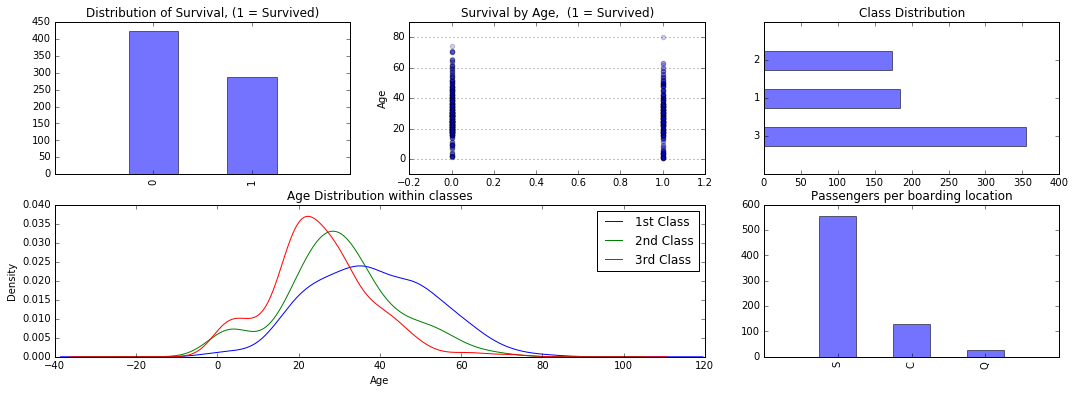

In [21]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

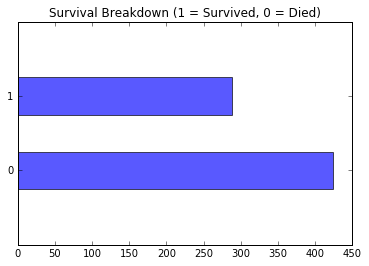

In [22]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

(-1, 2)

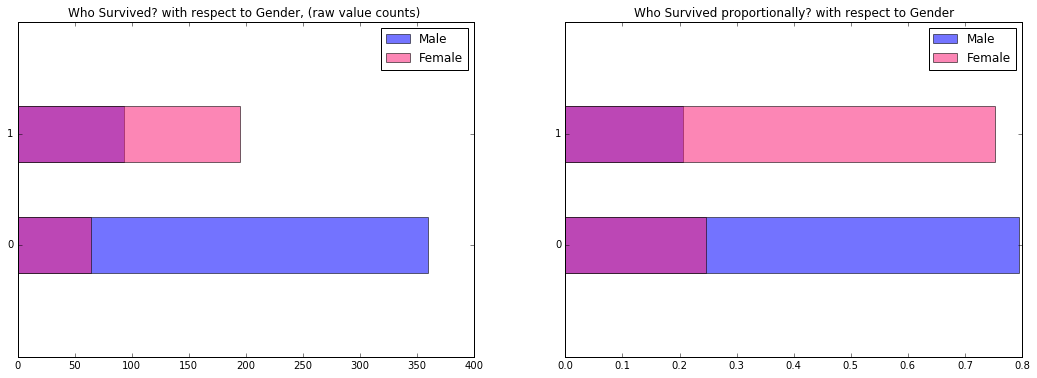

In [23]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = DataFrame()
df_female = DataFrame()
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

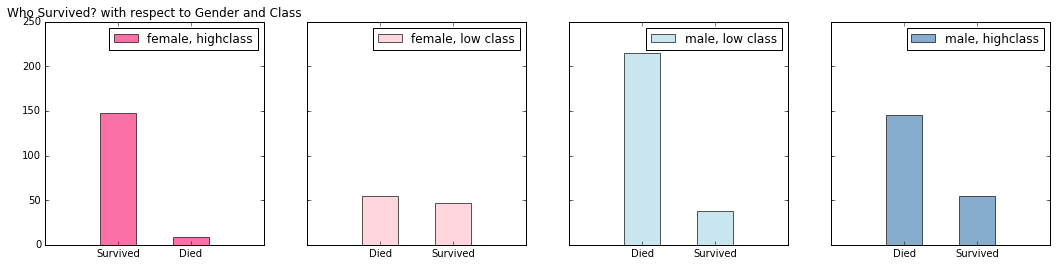

In [24]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [25]:
import pip
installed_packages = pip.get_installed_distributions()
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)
     for i in installed_packages])
print(installed_packages_list)

['alabaster==0.7.8', 'anaconda-client==1.4.0', 'anaconda-navigator==1.2.1', 'argcomplete==1.0.0', 'astropy==1.2.1', 'babel==2.3.3', 'backports-abc==0.4', 'backports.shutil-get-terminal-size==1.0.0', 'backports.ssl-match-hostname==3.4.0.2', 'beautifulsoup4==4.4.1', 'bitarray==0.8.1', 'blaze==0.10.1', 'bokeh==0.12.0', 'boto==2.40.0', 'bottleneck==1.1.0', 'cdecimal==2.3', 'cffi==1.6.0', 'chest==0.2.3', 'click==6.6', 'cloudpickle==0.2.1', 'clyent==1.2.2', 'colorama==0.3.7', 'comtypes==1.1.2', 'configobj==5.0.6', 'configparser==3.5.0b2', 'contextlib2==0.5.3', 'cryptography==1.4', 'cycler==0.10.0', 'cython==0.24', 'cytoolz==0.8.0', 'dask==0.10.0', 'datashape==0.5.2', 'decorator==4.0.10', 'dill==0.2.5', 'docutils==0.12', 'enum34==1.1.6', 'et-xmlfile==1.0.1', 'fastcache==1.0.2', 'flask-cors==2.1.2', 'flask==0.11.1', 'funcsigs==1.0.2', 'functools32==3.2.3.post2', 'futures==3.0.5', 'gevent==1.1.1', 'greenlet==0.4.10', 'grin==1.2.1', 'h5py==2.6.0', 'heapdict==1.0.0', 'idna==2.1', 'imagesize==0.7.

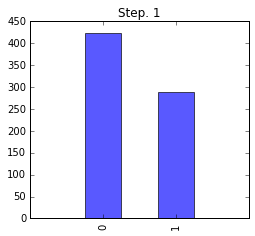

In [31]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1b = fig.add_subplot(341)
ax1b = fig.add_subplot(341)
x = len(df.Survived.value_counts())
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1b.set_xbound(lower=-1, upper=x)
plt.title("Step. 1")

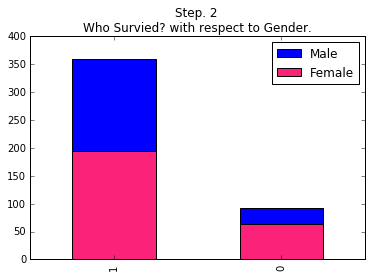

In [32]:
# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

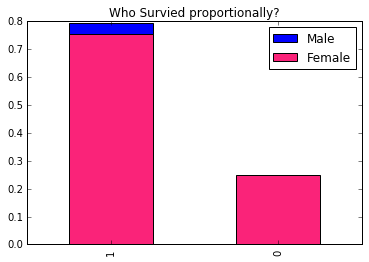

In [33]:
ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')

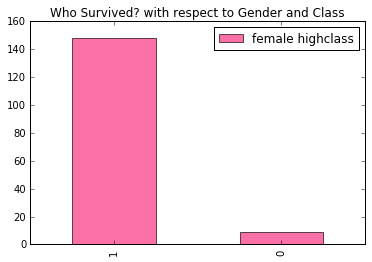

In [34]:
# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

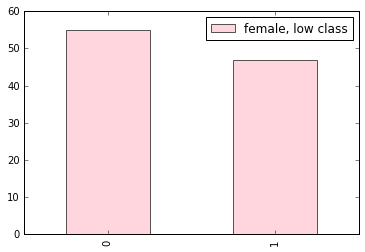

In [35]:
ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

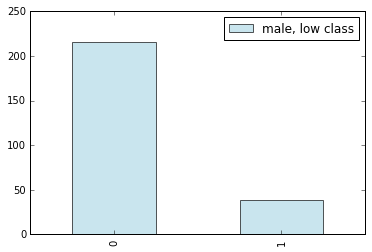

In [36]:
ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

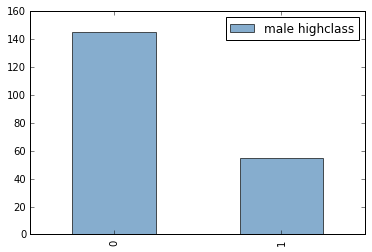

In [37]:
ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [38]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [39]:
df.Age = df.Age.astype(np.int64)
df.Pclass = df.Pclass.astype(np.object)
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [40]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = "Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)"
# create a results dictionary to hold our regression results for easy analysis later        
results = {}

In [41]:
desc = ModelDesc.from_formula(formula)
desc.describe()

'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'

In [42]:
print formula
y,x = dmatrices(desc.describe(),data=df,return_type='dataframe')
#dmatrices(formula, data=df,eval_env=1,NA_action='drop',return_type='dataframe')


Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)


In [43]:
# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res_v = model.fit().params.values
res = res_v = model.fit()
print res_v
print res.params

logit_margeff = res.get_margeff(method='dydx', at='overall')
print logit_margeff.summary()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444355
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444355
         Iterations 6
Intercept           4.540361
C(Pclass)[T.2L]    -1.268309
C(Pclass)[T.3L]    -2.497116
C(Sex)[T.male]     -2.624652
C(Embarked)[T.Q]   -0.835133
C(Embarked)[T.S]   -0.424070
Age                -0.043605
SibSp              -0.369781
dtype: float64
        Logit Marginal Effects       
Dep. Variable:               Survived
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
C(Pclass)[T.2L]     -0.1804      0.041     -4.425      0.000        -0.260    -0.100
C(Pclass)[T.3L]     -0.3552      0.035    -10.049      0.000        -0.424    -0.286
C(Sex)[T.male]      -0.3734      0.017    -21.927      0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Thu, 01 Sep 2016   Pseudo R-squ.:                  0.3415
Time:                        22:12:43   Log-Likelihood:                -316.38
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.853e-67
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5404      0.474      9.589      0.000         3.612     5.468
C(Pclass)[T.2L]     -1.2683      0.299     -4.248      0.000        -1.854    -0.683
C(Pclass)[T.3L]     -2.4971      0.296     -8.424      0.000        -3.078    -1.916
C(Sex)[T.male]      -2.6247      0.218    -12.062      0.000        -3.051    -2.198
C(Embarked)[T.Q]    -0.8351      0.597     -1.399      0.162        -2.006     0.335
C(Embarked)[T.S]    -0.4241      0.271     -1.567      0.117        -0.955     0.107
Age                 -0.0436      0.008     -5.268      0.000        -0.060    -0.027
SibSp               -0.3698      0.123     -3.004      0.003        -0.611    -0.129
====================================================================================
"""

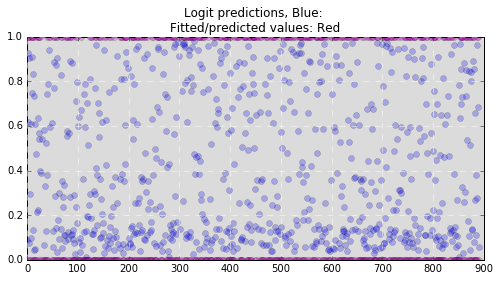

In [44]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

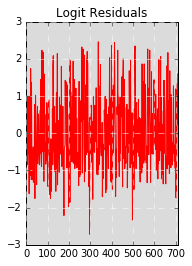

In [45]:
# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

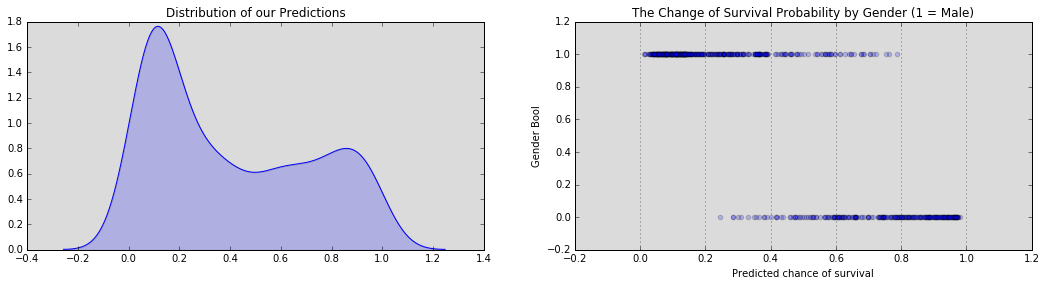

In [46]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

In [ ]:
fig.add_subplot(221, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(res.predict(),x.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

In [48]:
test_data = pd.read_csv("titanic_train.csv")
test_data = test_data.drop('Ticket',axis=1)
test_data = test_data.drop('Cabin',axis=1)
test_data = test_data.dropna()
test_data
test_data['Survived'] = 1.23
results
#from lib import kaggleaux as ka

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x123e3d30>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)']}

In [ ]:
# Use your model to make prediction on our test set. 
compared_resuts = model.predict(test_data,results, 'Logit')
compared_resuts = Series(compared_resuts)  # convert our model to a series for easy output
# output and submit to kaggle
compared_resuts.to_csv("logitregres.csv") #learning algorithms
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

 <a name="4.4"></a>
 ## HW4.4 Heritage Healthcare Prize (Predict # Days in Hospital next year)
[Back to Table of Contents](#TOC)

1. Introduction 
Back to Table of Contents

The Heritage Health Prize (HHP) was a data science challenge sponsored by The Heritage Provider Network. It took place from April 4, 2011 to April 4, 2013. For information on the winning entries, please see here.

Please see the following notebooks for more background and candidate solutions


- Spark Map-Reduce + MMLlib solution (with optional extensions) See [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/v52cxipe7yftf97/HeritageHealthPrizeUnitTestNotebook_Spark-Map-Reduce.ipynb)

- Spark SQL + MLLib solution (with optional extensions): [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/s2wxg6g982oho5m/HeritageHealthPrizeUnitTestNotebook_SQL_FINAL.ipynb)


Please look at section 7 in both notebooks complete any one or more the suggested next steps. E.g.,

* Please complete the EDA extensions using inspiration from the Titanic Notebook from above.
* __Complete Section 3.B: EDA-0. Gather information to see what transformations may need to be done on the data.__
Answer questions about each raw DataFrame. In general, is the data in good shape? For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what values does DaysInHospital take on? Are they all integers? What values does ClaimsTruncated take on? Are they all integers? In the Claims DataFrame (df_claims), how many different ProviderIDs are there? How many different PrimaryConditionGroups are there? What are their values? What values can the CharlesonIndex take on? Are they integers? In the Drug Count DataFrame (df_drug_count), what values can DrugCount take on? Are they all integers? Given this information, what transformations are needed?

* __Complete Section 3.D: EDA-1. Create tables and graphs to display information about the transformed DataFrames. __
For inspiration, see the Titanic notebook discussed above. Answer questions about each DataFrame. For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what is the minimum, maximum, mean, and standard deviation of DaysInHospital? In the Claims DataFrame, group by MemberID and Year and count the number of records. What is the minimum, maximum, mean, and standard deviation of the count? Do the same for the Drug Count and Lab Count DataFrames, etc.


* __ Please generate ensemble of DT model using 100 trees with 8 nodes and report the Loss __
Try additional models. See possibilities here (e.g. Decision Tree Regressor, Gradient-Boosted Trees Regressor, Random Forest Regressor). See an example here. Tune their hyperparameters. Try different feature selections. Try a two-step model.


In [53]:
import sys
import os
import pyspark
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql.types import *
import glob

sql_context = SQLContext(sc)

DATA_DIR = os.path.join('HHealthdata')

In [54]:
def load_csv_file(filename):

    input_path = os.path.join(DATA_DIR, filename)  
    df_pandas = pd.read_csv(input_path, dtype='str')  
    schema_string = df_pandas.columns.values.tolist()
    fields = [StructField(field_name, StringType(), True) for field_name in schema_string]
    schema = StructType(fields)  
    return sql_context.createDataFrame(df_pandas, schema)

def load_csv_files():
    
    df_pandas = pd.DataFrame()
    input_path = glob.glob(DATA_DIR2)
    for file in input_path:
        df = pd.read_csv(input_path, dtype='str')
        df_pandas = pd.concat(df_pandas, df, ignore_index=True)
    schema_string = df_pandas.columns.values.tolist()
    fields = [StructField(field_name, StringType(), True) for field_name in schema_string]
    schema = StructType(fields)    
    return sql_context.createDataFrame(df_pandas, schema)


df_target_Y2 = load_csv_file('DaysInHospital_Y2.csv').cache()
# Check the data
print "Schema for target_Y2 DataFrame with %d rows:" %(df_target_Y2.count())
df_target_Y2.printSchema()
df_target_Y2.show(1)

# Read in Year 3 Target Variables
df_target_Y3 = load_csv_file('DaysInHospital_Y3.csv').cache()
# Check the data
print "Schema for target_Y3 DataFrame with %d rows:" %(df_target_Y3.count())
df_target_Y3.printSchema()
df_target_Y3.show(1)

# Read in Year 4 Target Variables
df_target_Y4 = load_csv_file('Target.csv').cache()
# Check the data
print "Schema for target_Y4 DataFrame with %d rows:" %(df_target_Y4.count())
df_target_Y4.printSchema()
df_target_Y4.show(1)

# Read in Claims Data
#df_claims = load_csv_files().cache()
df_claims = load_csv_file('claims.csv').cache()
# Check the data
print "Schema for claims DataFrame with %d rows:" %(df_claims.count())
df_claims.printSchema()
df_claims.show(1)

# Read in Drug Data
df_drug_count = load_csv_file('DrugCount.csv').cache()
# Check the data
print "Schema for drug_count DataFrame with %d rows:" %(df_drug_count.count())
df_drug_count.printSchema()
df_drug_count.show(1)

# Read in Lab Data
df_lab_count = load_csv_file('LabCount.csv').cache()
# Check the data
print "Schema for lab_count DataFrame with %d rows:" %(df_lab_count.count())
df_lab_count.printSchema()
df_lab_count.show(1)

# Read in Members Data
df_members = load_csv_file('Members.csv').cache()
# Check the data
print "Schema for members DataFrame with %d rows:" %(df_members.count())
df_members.printSchema()
df_members.show(1)

Schema for target_Y2 DataFrame with 76038 rows:
root
 |-- MemberID: string (nullable = true)
 |-- ClaimsTruncated: string (nullable = true)
 |-- DaysInHospital: string (nullable = true)

+--------+---------------+--------------+
|MemberID|ClaimsTruncated|DaysInHospital|
+--------+---------------+--------------+
|24027423|              0|             0|
+--------+---------------+--------------+
only showing top 1 row

Schema for target_Y3 DataFrame with 71435 rows:
root
 |-- MemberID: string (nullable = true)
 |-- ClaimsTruncated: string (nullable = true)
 |-- DaysInHospital: string (nullable = true)

+--------+---------------+--------------+
|MemberID|ClaimsTruncated|DaysInHospital|
+--------+---------------+--------------+
|90963501|              0|             0|
+--------+---------------+--------------+
only showing top 1 row

Schema for target_Y4 DataFrame with 70942 rows:
root
 |-- MemberID: string (nullable = true)
 |-- ClaimsTruncated: string (nullable = true)
 |-- DaysInHospita

In [55]:
# Method 1: SQL queries on temporary tables
# In order to run SQL queries on DataFrames, we must first register them as temporary tables

# df_target_Y2.registerTempTable("target_Y2_tt")
# df_target_Y3.registerTempTable("target_Y3_tt")
# df_target_Y4.registerTempTable("target_Y4_tt")
df_claims.registerTempTable("claims_tt")
# df_drug_count.registerTempTable("drug_count_tt")
# df_lab_count.registerTempTable("lab_count_tt")
# df_members.registerTempTable("members_tt")

In [56]:
# Then we can run some queries on the tt tables
# Example: Count the number of samples in the Claims Data where the LengthOfStay is suppressed
df_sup_los_1 = sql_context.sql("SELECT COUNT(MemberID) FROM claims_tt WHERE SupLOS = 1")
print 'Number of samples in the Claims Data where the LengthOfStay is suppressed:'
df_sup_los_1.show(1)
df_sup_los_1.unpersist()
# Example:  Get all possible values of the variable PrimaryConditionGroup
df_pcg = sql_context.sql("SELECT DISTINCT(PrimaryConditionGroup) FROM claims_tt")
print 'Possible Values for PrimaryConditionGroup:'
df_pcg.show(df_pcg.count())

# Free up memory
sql_context.dropTempTable("claims_tt")

Number of samples in the Claims Data where the LengthOfStay is suppressed:
+----+
| _c0|
+----+
|1053|
+----+

Possible Values for PrimaryConditionGroup:
+---------------------+
|PrimaryConditionGroup|
+---------------------+
|                  NaN|
|              NEUMENT|
|               RESPR4|
|               INFEC4|
|               SEPSIS|
|               STROKE|
|              PERVALV|
|               CANCRA|
|               CANCRB|
|              LIVERDZ|
|              SEIZURE|
|               CANCRM|
|               PRGNCY|
|               SKNAUT|
|               HEART2|
|               HEART4|
|                  CHF|
|               RENAL1|
|               RENAL2|
|               RENAL3|
|                ROAMI|
|               MISCL1|
|               MISCL5|
|             ARTHSPIN|
|               PNCRDZ|
|              PERINTL|
|                  AMI|
|              APPCHOL|
|               CATAST|
|               TRAUMA|
|                HIPFX|
|                PNEUM|
|     

In [57]:
# Method 2: Direct queries of DataFrames
# DataFrame Operations:  https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame

# Example: Get counts of values in each column of Claims data
print df_claims.columns
columns_for_analysis = ['Year', 'Specialty', 'PlaceSvc', 'LengthOfStay', 'DSFS', 
                        'PrimaryConditionGroup', 'CharlsonIndex', 'ProcedureGroup', 'SupLOS']
for column in columns_for_analysis:
    df_claims.groupBy(column).count().show()

['MemberID', 'ProviderID', 'Vendor', 'PCP', 'Year', 'Specialty', 'PlaceSvc', 'PayDelay', 'LengthOfStay', 'DSFS', 'PrimaryConditionGroup', 'CharlsonIndex', 'ProcedureGroup', 'SupLOS']
+----+-----+
|Year|count|
+----+-----+
|  Y1|77773|
|  Y2|81629|
|  Y3|81657|
+----+-----+

+--------------------+-----+
|           Specialty|count|
+--------------------+-----+
|                 NaN|  741|
|Obstetrics and Gy...| 3266|
|               Other| 8467|
|  Diagnostic Imaging|18761|
|          Pediatrics| 7762|
|      Rehabilitation| 5125|
|            Internal|61093|
|           Emergency|11344|
|             Surgery|18745|
|          Laboratory|58998|
|      Anesthesiology| 2929|
|    General Practice|42489|
|           Pathology| 1339|
+--------------------+-----+

+-------------------+------+
|           PlaceSvc| count|
+-------------------+------+
|                NaN|   660|
|        Urgent Care| 17913|
|              Other|  1088|
|    Independent Lab| 59380|
|          Ambulance|  3096|

In [58]:
#df_claims = df_claims.drop('LengthOfStay')
df_claims.dropna(subset=['Specialty'])

print df_claims.columns
columns_for_analysis = ['Year', 'Specialty', 'PlaceSvc', 'DSFS', 
                        'PrimaryConditionGroup', 'CharlsonIndex', 'ProcedureGroup', 'SupLOS']
for column in columns_for_analysis:
    df_claims.groupBy(column).count().show()

['MemberID', 'ProviderID', 'Vendor', 'PCP', 'Year', 'Specialty', 'PlaceSvc', 'PayDelay', 'LengthOfStay', 'DSFS', 'PrimaryConditionGroup', 'CharlsonIndex', 'ProcedureGroup', 'SupLOS']
+----+-----+
|Year|count|
+----+-----+
|  Y1|77773|
|  Y2|81629|
|  Y3|81657|
+----+-----+

+--------------------+-----+
|           Specialty|count|
+--------------------+-----+
|                 NaN|  741|
|Obstetrics and Gy...| 3266|
|               Other| 8467|
|  Diagnostic Imaging|18761|
|          Pediatrics| 7762|
|      Rehabilitation| 5125|
|            Internal|61093|
|           Emergency|11344|
|             Surgery|18745|
|          Laboratory|58998|
|      Anesthesiology| 2929|
|    General Practice|42489|
|           Pathology| 1339|
+--------------------+-----+

+-------------------+------+
|           PlaceSvc| count|
+-------------------+------+
|                NaN|   660|
|        Urgent Care| 17913|
|              Other|  1088|
|    Independent Lab| 59380|
|          Ambulance|  3096|